In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
labels = ['Accident', 'Cultural', 'Economic', 'Political', 'Research', 'Science','Social','Sport','State','World']
df = pd.read_csv('mydata.csv')
train_set = pd.DataFrame()


In [3]:
from __future__ import division
porpotion = dict()
for label in labels:
    porpotion[label] = len(df[df.label==label])
porpotion    

{'Accident': 112,
 'Cultural': 456,
 'Economic': 430,
 'Political': 309,
 'Research': 268,
 'Science': 238,
 'Social': 290,
 'Sport': 460,
 'State': 344,
 'World': 197}

In [4]:
frames = []
for label in labels:
    df_subset = df[df.label == label].sample(n=int(porpotion[label] * 0.7))
    df = df.drop(df_subset.index)
    frames.append(df_subset)
train_set = pd.concat(frames,ignore_index=True)    

In [5]:
df.reset_index(drop=True)
df.index = range(0,len(df))
train_set.index = range(0,len(train_set))

In [6]:
X_train = train_set.iloc[:,1:]
X_test = df.iloc[:,1:]

In [7]:
y_train = train_set.iloc[:,0]
y_test = df.iloc[:,0]

In [33]:
def plot_confusion_matrix(y_test, y_predict_test,labels,model):
    cm=confusion_matrix(y_test, y_predict_test,labels)
    df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig(model + '.png')
    plt.show()
    
    return df_cm

Decision Tree
parameters: criterion=gini,max_depth=300, min_samples_split=2
('Accuracy on Train set: ', 0.93130474873213465)
('Accuracy on Test set: ', 0.47165775401069521)


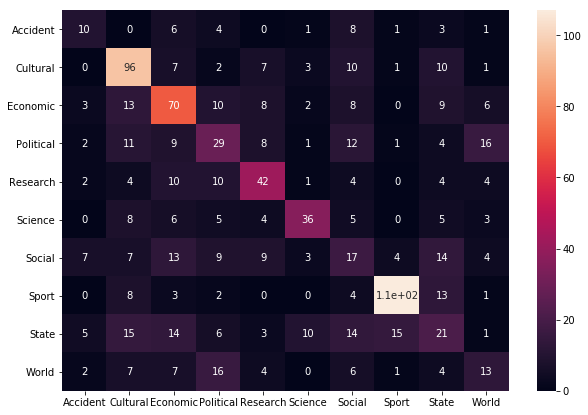

recall
{'Accident': 32.258064516129032, 'Science': 63.157894736842103, 'Political': 31.182795698924732, 'State': 24.137931034482758, 'Research': 49.411764705882355, 'Cultural': 56.80473372781065, 'Economic': 48.275862068965516, 'Social': 19.318181818181817, 'World': 26.0, 'Sport': 82.307692307692307}
percision
{'Accident': 29.411764705882355, 'Science': 50.0, 'Political': 31.182795698924732, 'State': 20.192307692307693, 'Research': 51.851851851851848, 'Cultural': 70.072992700729927, 'Economic': 54.263565891472865, 'Social': 19.540229885057471, 'World': 21.666666666666668, 'Sport': 77.536231884057969}


,Accident,Cultural,Economic,Political,Research,Science,Social,Sport,State,World
Accident,10,0,6,4,0,1,8,1,3,1
Cultural,0,96,7,2,7,3,10,1,10,1
Economic,3,13,70,10,8,2,8,0,9,6
Political,2,11,9,29,8,1,12,1,4,16
Research,2,4,10,10,42,1,4,0,4,4
Science,0,8,6,5,4,36,5,0,5,3
Social,7,7,13,9,9,3,17,4,14,4
Sport,0,8,3,2,0,0,4,107,13,1
State,5,15,14,6,3,10,14,15,21,1
World,2,7,7,16,4,0,6,1,4,13


In [34]:
#decision tree by spliting data two keep proportion of each class the same in test and train data set
clf = DecisionTreeClassifier(criterion='gini',max_depth=300, min_samples_split=2).fit(X_train, y_train)
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
print('Decision Tree')
print ('parameters: ' + 'criterion=gini,max_depth=300, min_samples_split=2')
print('Accuracy on Train set: ',accuracy_score(y_train, y_predict_train))
print('Accuracy on Test set: ',accuracy_score(y_test, y_predict_test))
cm = plot_confusion_matrix(y_test, y_predict_test,labels,'Decision Tree')
a = cm.sum(axis=0)
b = cm.sum(axis=1)
percision  = dict()
recall = dict()
for label in labels:
    percision[label] = cm[label][label] / b[label] * 100
    recall[label] = cm[label][label] /a[label] * 100
print 'recall'
print recall
for key in recall.keys:
    print key , ': ' , recall()
    print 'percision'
print percision
cm


In [66]:
#decision tree by cross validation
x = pd.read_csv('mydata.csv')
X = x.iloc[:,1:]
y = x.iloc[:,0]
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print scores.mean()

0.479982286815


In [ ]:
cm


Random Forest
parameters: max_depth=300,random_state=0, n_estimators=100, max_features =sqrt, criterion=gini
('Accuracy on Train set: ', 0.93130474873213465)
('Accuracy on Test set: ', 0.58930481283422465)


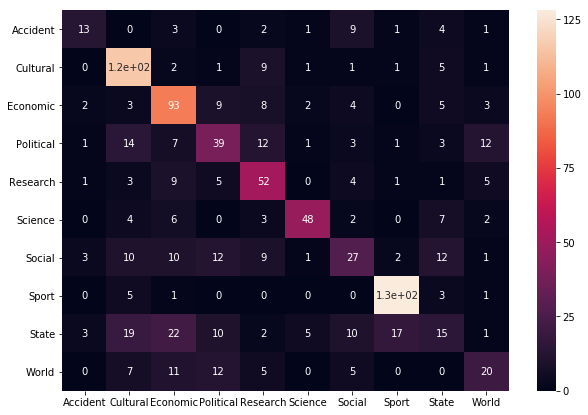

recall
{'Accident': 56.521739130434781, 'Science': 81.355932203389841, 'Political': 44.31818181818182, 'State': 27.27272727272727, 'Research': 50.980392156862742, 'Cultural': 64.088397790055254, 'Economic': 56.707317073170728, 'Social': 41.53846153846154, 'World': 42.553191489361701, 'Sport': 84.768211920529808}
percision
{'Accident': 38.235294117647058, 'Science': 66.666666666666657, 'Political': 41.935483870967744, 'State': 14.423076923076922, 'Research': 64.197530864197532, 'Cultural': 84.671532846715323, 'Economic': 72.093023255813947, 'Social': 31.03448275862069, 'World': 33.333333333333329, 'Sport': 92.753623188405797}


,Accident,Cultural,Economic,Political,Research,Science,Social,Sport,State,World
Accident,13,0,3,0,2,1,9,1,4,1
Cultural,0,116,2,1,9,1,1,1,5,1
Economic,2,3,93,9,8,2,4,0,5,3
Political,1,14,7,39,12,1,3,1,3,12
Research,1,3,9,5,52,0,4,1,1,5
Science,0,4,6,0,3,48,2,0,7,2
Social,3,10,10,12,9,1,27,2,12,1
Sport,0,5,1,0,0,0,0,128,3,1
State,3,19,22,10,2,5,10,17,15,1
World,0,7,11,12,5,0,5,0,0,20


In [44]:
#random forest by spliting data two keep proportion of each class the same in test and train data set
clf = RandomForestClassifier(max_depth=300,random_state=0, n_estimators=100, max_features ='sqrt', criterion='gini').fit(X_train, y_train)
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
print('\nRandom Forest')
print ('parameters: ' + 'max_depth=300,random_state=0, n_estimators=100, max_features =sqrt, criterion=gini')
print('Accuracy on Train set: ',accuracy_score(y_train, y_predict_train))
print('Accuracy on Test set: ',accuracy_score(y_test, y_predict_test))
cm = plot_confusion_matrix(y_test, y_predict_test,labels, 'Rnadom forest')
a = cm.sum(axis=0)
b = cm.sum(axis=1)
percision  = dict()
recall = dict()
for label in labels:
    percision[label] = cm[label][label] / b[label] * 100
    recall[label] = cm[label][label] /a[label] * 100
print 'recall'
print recall
print 'percision'
print percision
cm

In [68]:
#random forest by cross validation
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print scores.mean()

0.603128556301



Support Vector Machine
('Accuracy on Train set: ', 0.91009681881051174)
('Accuracy on Test set: ', 0.57647058823529407)


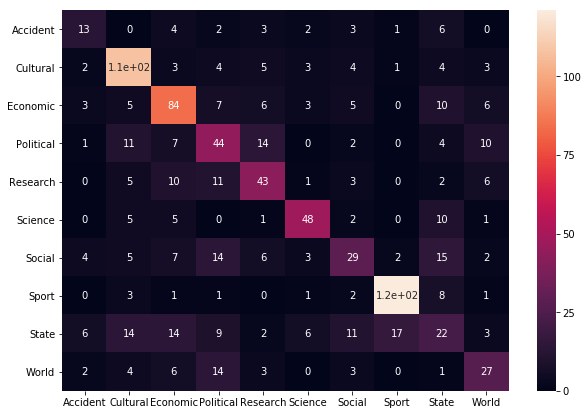

recall
{'Accident': 41.935483870967744, 'Science': 71.641791044776113, 'Political': 41.509433962264154, 'State': 26.829268292682929, 'Research': 51.807228915662648, 'Cultural': 67.5, 'Economic': 59.574468085106382, 'Social': 45.3125, 'World': 45.762711864406782, 'Sport': 85.211267605633793}
percision
{'Accident': 38.235294117647058, 'Science': 66.666666666666657, 'Political': 47.311827956989248, 'State': 21.153846153846153, 'Research': 53.086419753086425, 'Cultural': 78.832116788321173, 'Economic': 65.116279069767444, 'Social': 33.333333333333329, 'World': 45.0, 'Sport': 87.681159420289859}


,Accident,Cultural,Economic,Political,Research,Science,Social,Sport,State,World
Accident,13,0,4,2,3,2,3,1,6,0
Cultural,2,108,3,4,5,3,4,1,4,3
Economic,3,5,84,7,6,3,5,0,10,6
Political,1,11,7,44,14,0,2,0,4,10
Research,0,5,10,11,43,1,3,0,2,6
Science,0,5,5,0,1,48,2,0,10,1
Social,4,5,7,14,6,3,29,2,15,2
Sport,0,3,1,1,0,1,2,121,8,1
State,6,14,14,9,2,6,11,17,22,3
World,2,4,6,14,3,0,3,0,1,27


In [45]:
#svm by spliting data two keep proportion of each class the same in test and train data set
clf = svm.SVC(kernel='rbf', C= 100, gamma= 0.0001).fit(X_train, y_train)
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
print('\nSupport Vector Machine')
print('Accuracy on Train set: ',accuracy_score(y_train, y_predict_train))
print('Accuracy on Test set: ',accuracy_score(y_test, y_predict_test))
cm = plot_confusion_matrix(y_test, y_predict_test,labels, 'Support Vector machine')
a = cm.sum(axis=0)
b = cm.sum(axis=1)
percision  = dict()
recall = dict()
for label in labels:
    percision[label] = cm[label][label] / b[label] * 100
    recall[label] = cm[label][label] /a[label] * 100
print 'recall'
print recall
print 'percision'
print percision
cm

In [70]:
#svm by cross validation
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print scores.mean()

0.580290429593



MultinomialNB Naive Bayes
('Accuracy on Train set: ', 0.61641309359151686)
('Accuracy on Test set: ', 0.56898395721925132)


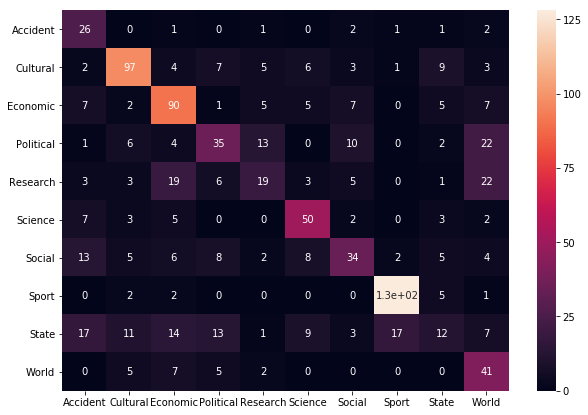

recall
{'Accident': 34.210526315789473, 'Science': 61.728395061728392, 'Political': 46.666666666666664, 'State': 27.906976744186046, 'Research': 39.583333333333329, 'Cultural': 72.388059701492537, 'Economic': 59.210526315789465, 'Social': 51.515151515151516, 'World': 36.936936936936938, 'Sport': 85.90604026845638}
percision
{'Accident': 76.470588235294116, 'Science': 69.444444444444443, 'Political': 37.634408602150536, 'State': 11.538461538461538, 'Research': 23.456790123456788, 'Cultural': 70.802919708029194, 'Economic': 69.767441860465112, 'Social': 39.080459770114942, 'World': 68.333333333333329, 'Sport': 92.753623188405797}


,Accident,Cultural,Economic,Political,Research,Science,Social,Sport,State,World
Accident,26,0,1,0,1,0,2,1,1,2
Cultural,2,97,4,7,5,6,3,1,9,3
Economic,7,2,90,1,5,5,7,0,5,7
Political,1,6,4,35,13,0,10,0,2,22
Research,3,3,19,6,19,3,5,0,1,22
Science,7,3,5,0,0,50,2,0,3,2
Social,13,5,6,8,2,8,34,2,5,4
Sport,0,2,2,0,0,0,0,128,5,1
State,17,11,14,13,1,9,3,17,12,7
World,0,5,7,5,2,0,0,0,0,41


In [46]:
#MultinomialNB by spliting data two keep proportion of each class the same in test and train data set
clf = MultinomialNB().fit(X_train, y_train)
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
print('\nMultinomialNB Naive Bayes')
print('Accuracy on Train set: ',accuracy_score(y_train, y_predict_train))
print('Accuracy on Test set: ',accuracy_score(y_test, y_predict_test))
cm = plot_confusion_matrix(y_test, y_predict_test,labels, 'MultinomialNB Naive Bayes')
a = cm.sum(axis=0)
b = cm.sum(axis=1)
percision  = dict()
recall = dict()
for label in labels:
    percision[label] = cm[label][label] / b[label] * 100
    recall[label] = cm[label][label] /a[label] * 100
print 'recall'
print recall
print 'percision'
print percision
cm


KNN
('Accuracy on Train set: ', 0.62332872291378516)
('Accuracy on Test set: ', 0.53475935828877008)


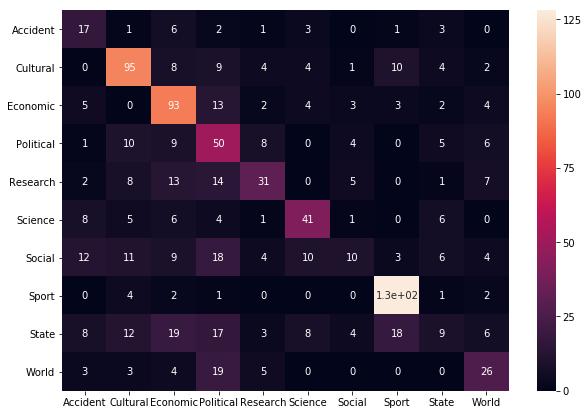

recall
{'Accident': 30.357142857142854, 'Science': 58.571428571428577, 'Political': 34.013605442176868, 'State': 24.324324324324326, 'Research': 52.542372881355938, 'Cultural': 63.758389261744966, 'Economic': 55.029585798816569, 'Social': 35.714285714285715, 'World': 45.614035087719294, 'Sport': 78.527607361963192}
percision
{'Accident': 50.0, 'Science': 56.944444444444443, 'Political': 53.763440860215049, 'State': 8.6538461538461533, 'Research': 38.271604938271601, 'Cultural': 69.34306569343066, 'Economic': 72.093023255813947, 'Social': 11.494252873563218, 'World': 43.333333333333336, 'Sport': 92.753623188405797}


,Accident,Cultural,Economic,Political,Research,Science,Social,Sport,State,World
Accident,17,1,6,2,1,3,0,1,3,0
Cultural,0,95,8,9,4,4,1,10,4,2
Economic,5,0,93,13,2,4,3,3,2,4
Political,1,10,9,50,8,0,4,0,5,6
Research,2,8,13,14,31,0,5,0,1,7
Science,8,5,6,4,1,41,1,0,6,0
Social,12,11,9,18,4,10,10,3,6,4
Sport,0,4,2,1,0,0,0,128,1,2
State,8,12,19,17,3,8,4,18,9,6
World,3,3,4,19,5,0,0,0,0,26


In [47]:
#knn by cross validatio
clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)
print('\nKNN')
print('Accuracy on Train set: ',accuracy_score(y_train, y_predict_train))
print('Accuracy on Test set: ',accuracy_score(y_test, y_predict_test))
cm = plot_confusion_matrix(y_test, y_predict_test,labels, 'KNN')
a = cm.sum(axis=0)
b = cm.sum(axis=1)
percision  = dict()
recall = dict()
for label in labels:
    percision[label] = cm[label][label] / b[label] * 100
    recall[label] = cm[label][label] /a[label] * 100
print 'recall'
print recall
print 'percision'
print percision
cm

In [15]:
a = cm.sum(axis=0)
a['Accident']

30

In [38]:
df = pd.DataFrame(percision,index=range(0,1))

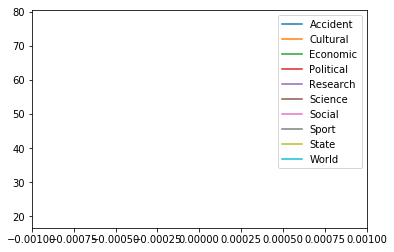

In [42]:
plt.plot(df)
plt.show()

ImportError: No module named plotly.plotly